# Импорт библиотек и загрузка данных

In [2]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
from scipy import stats

Загружен уже очищенный в прошлом задании датасет

In [4]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean.csv


In [5]:
df = pd.read_csv('/content/cars_moldova_clean.csv', delimiter = ',')
df

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32215  Volkswagen        Passat  2016      Sedan   88000.0   
32216  Land Rover    Freelander  2002  Crossover  225000.0   
32217       Dacia     Logan Mcv  2015  Universal   89000.0   
32218       Mazda             6  2006      Combi  370000.0   
32219     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
0                    1800.0        Hybrid    Automatic       7750.0   11   
1                    1500.0        Diesel       Manual       8550.0    8   
2                    1500.0        Diesel       Manual       6550.0   10   
3                    1600.0  Metan/Propan       Manual       4100.0   16   
4                    2200.0        Diesel       Manual       3490.0   22   
...                     ...           ...          ...          ...  ...   
32215                1800.0        Petrol    Automatic      11500.0    6   
32216                1800.0  Metan/Propan       Manual       4400.0   20   
32217                1500.0        Diesel       Manual       7000.0    7   
32218                2000.0        Diesel       Manual       4000.0   16   
32219                1500.0        Diesel       Manual       4000.0   16   

            km_year  
0      17727.272727  
1      16875.000000  
2      11000.000000  
3      12500.000000  
4      13636.363636  
...             ...  
32215  14666.666667  
32216  11250.000000  
32217  12714.285714  
32218  23125.000000  
32219  18750.000000  

[32220 rows x 11 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


# Визуализация

Гистограмма показывающая наиболее частый возраст машин в зависимости от типа передачи

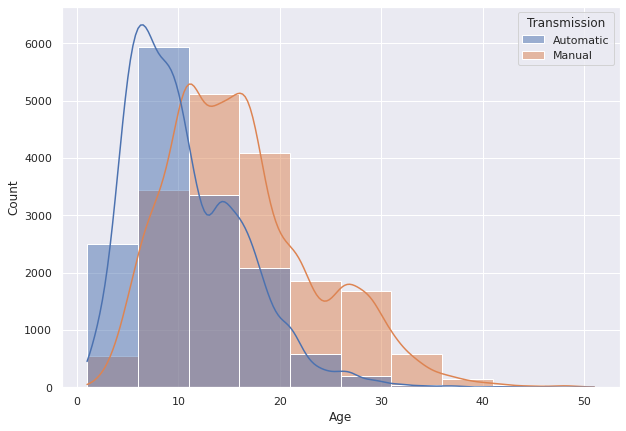

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(    
    data=df,
    x="Age",
    hue="Transmission",
    bins=10,
    kde=True  
    );

Скаттерограмма с зависимостью цены от возраста, а ещё с пробегом и типом передачи

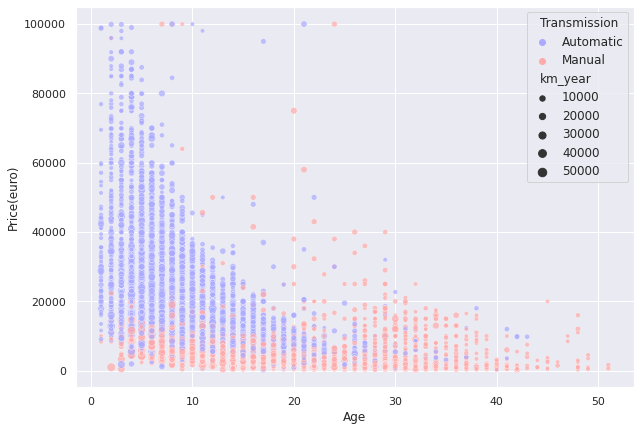

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="Age", y="Price(euro)",
    hue="Transmission", 
    size = "km_year", alpha = 0.7,
             palette='bwr'
    );

Скаттерограмма с зависимостью цены от объёма двигателя с разделением на тип топлива

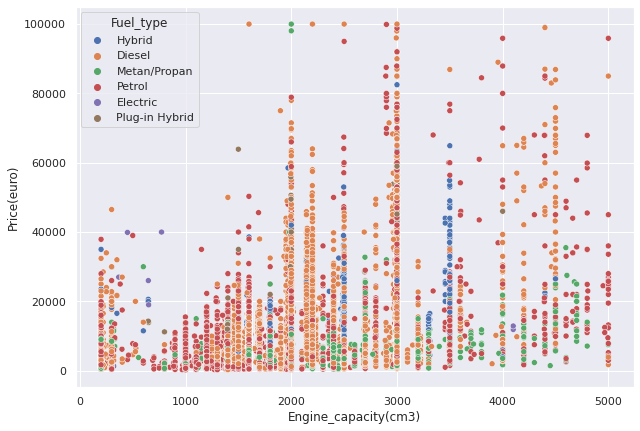

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="Engine_capacity(cm3)", y="Price(euro)",
    hue="Fuel_type", 
    );

# Добавление дополнительных признаков

**Квантильные категории для столбца "удельный пробег за год"**

Введена новая колонка "mileage" куда записывается значение big если пробег за год больше 25 000, small если он меньше 10 000 и medium если он между 10 000 и 25 000

In [7]:
conditions = [(df['km_year'] <= 10000), (df['km_year'] >= 25000)]
values = ['small', 'big']
df['mileage'] = np.select(conditions, values, default='medium')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
 11  mileage               32220 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


Если автомобиль находится в категории Rare и его стоимость меньше 3000 (цифры взяты наугад), то его производитель заменяется на Rare_cheap. А если его стоимость больше 30 000, то на Rare_expencive

In [10]:
df['Make'] = np.where((df['Price(euro)'] < 3000) & (df['Make'] == 'Rare'), 'Rare_cheap', df['Make'])
df['Make'] = np.where((df['Price(euro)'] < 30000) & (df['Make'] == 'Rare'), 'Rare_expencive', df['Make'])

In [11]:
counts = df.Make.value_counts()

counts

Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Seat               239
Porsche            190
Fiat               183
Suzuki             153
Subaru             150
Rare_expencive     122
Rare_cheap         121
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / 

# Предварительная обработка данных

Разделение данных на категориальные и числовые

In [12]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'mileage'] 
 Число столблцов =  6
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] 
 Число столблцов =  6


Нормализация

In [13]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

Стандартизация

In [15]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns]-M)/STD

Степенное преобразование (Box-Cox)

In [ ]:
stats.boxcox(df['Distance'])
stats.boxcox(df['Year'])
stats.boxcox(df['Engine_capacity(cm3)'])
stats.boxcox(df['Price(euro)'])
stats.boxcox(df['Age'])
stats.boxcox(df['km_year'])

(array([1640.99782174, 1583.46034517, 1161.32663169, ..., 1289.82565176,
        1989.41304406, 1709.04439953]), 0.72377945989018)

Ordinal / One-Hot Encoding

In [23]:
pd.get_dummies(df[cat_columns])

Make_Alfa Romeo  Make_Audi  Make_BMW  Make_Chevrolet  Make_Chrysler  \
0                    0          0         0               0              0   
1                    0          0         0               0              0   
2                    0          0         0               0              0   
3                    0          0         0               0              0   
4                    0          0         0               0              0   
...                ...        ...       ...             ...            ...   
32215                0          0         0               0              0   
32216                0          0         0               0              0   
32217                0          0         0               0              0   
32218                0          0         0               0              0   
32219                0          0         0               0              0   

       Make_Citroen  Make_Dacia  Make_Daewoo  Make_Daihatsu  Make_Dodge  ...  \
0                 0           0            0              0           0  ...   
1                 0           0            0              0           0  ...   
2                 0           0            0              0           0  ...   
3                 0           0            0              0           0  ...   
4                 0           0            0              0           0  ...   
...             ...         ...          ...            ...         ...  ...   
32215             0           0            0              0           0  ...   
32216             0           0            0              0           0  ...   
32217             0           1            0              0           0  ...   
32218             0           0            0              0           0  ...   
32219             0           0            0              0           0  ...   

       Fuel_type_Electric  Fuel_type_Hybrid  Fuel_type_Metan/Propan  \
0                       0                 1                       0   
1                       0                 0                       0   
2                       0                 0                       0   
3                       0                 0                       1   
4                       0                 0                       0   
...                   ...               ...                     ...   
32215                   0                 0                       0   
32216                   0                 0                       1   
32217                   0                 0                       0   
32218                   0                 0                       0   
32219                   0                 0                       0   

       Fuel_type_Petrol  Fuel_type_Plug-in Hybrid  Transmission_Automatic  \
0                     0                         0                       1   
1                     0                         0                       0   
2                     0                         0                       0   
3                     0                         0                       0   
4                     0                         0                       0   
...                 ...                       ...                     ...   
32215                 1                         0                       1   
32216                 0                         0                       0   
32217                 0                         0                       0   
32218                 0                         0                       0   
32219                 0                         0                       0   

       Transmission_Manual  mileage_big  mileage_medium  mileage_small  
0                        0            0               1              0  
1                        1            0               1              0  
2                        1            0               1              0  
3                        1            0

# Сохранение данных

Эта версия таблицы отличается от cars_moldova_clean тем, что туда добавлена новая категория mileage и проведена предварительная обработка данных.

In [ ]:
DF.to_csv('/content/cars_moldova_norm.csv',index=False)